In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [25]:
base_dir = "tsrc_spectrograms_pack/tsrc_sprectrograms/train"

# list of classes
classes = [subdir for subdir in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, subdir))]
# uncomment for manual class name input instead
# classes = ['right']
print(f"Classes found: {classes}, total length: {len(classes)}")


Classes found: ['right', 'eight', 'cat', 'tree', 'bed', 'happy', 'go', 'dog', 'no', 'wow', 'nine', 'left', 'stop', 'three', 'sheila', 'one', 'bird', 'zero', 'seven', 'up', 'marvin', 'two', 'house', 'down', 'six', 'yes', 'on', 'five', 'off', 'four'], total length: 30


In [26]:
data = []  # To store flattened spectrograms
labels = []  # To store class labels

for word_class in classes:
    class_dir = os.path.join(base_dir, word_class)
    # loop through spectograms inside the class
    for file_name in os.listdir(class_dir):
        if file_name.endswith('.png'):
            file_path = os.path.join(class_dir, file_name)
            
             # Convert to grayscale
            img = Image.open(file_path).convert('L') 
            
            # Resize
            img = img.resize((100, 100))  
            
            # Flatten the image
            img_array = np.array(img).flatten()
            
            # Append the data and label
            data.append(img_array)
            labels.append(word_class)

data = np.array(data)  # Shape: (n_samples, 128*128)
labels = np.array(labels)
print(f"Loaded {data.shape[0]} samples with {len(np.unique(labels))} classes.")


Loaded 45312 samples with 30 classes.


In [27]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)


In [28]:
n_components = 2 
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data_standardized)


In [29]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by components: {explained_variance}")


Explained variance by components: [0.27289861 0.14876532]


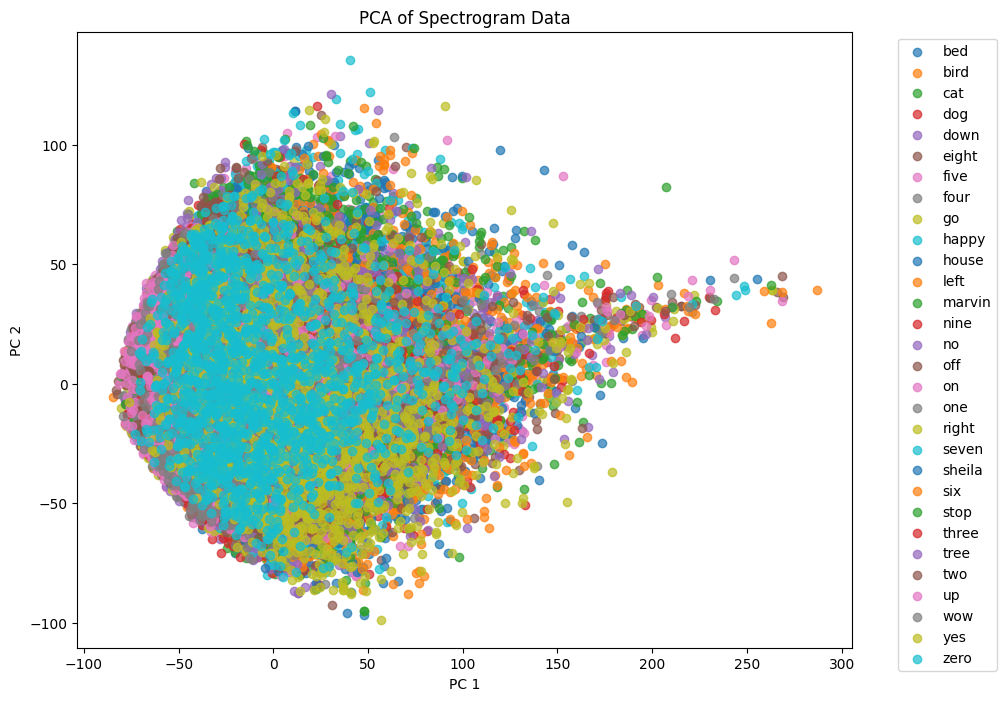

In [30]:
unique_classes = np.unique(labels)

plt.figure(figsize=(10, 8))
for word_class in unique_classes:
    idx = np.where(labels == word_class)
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], label=word_class, alpha=0.7)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA of Spectrogram Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


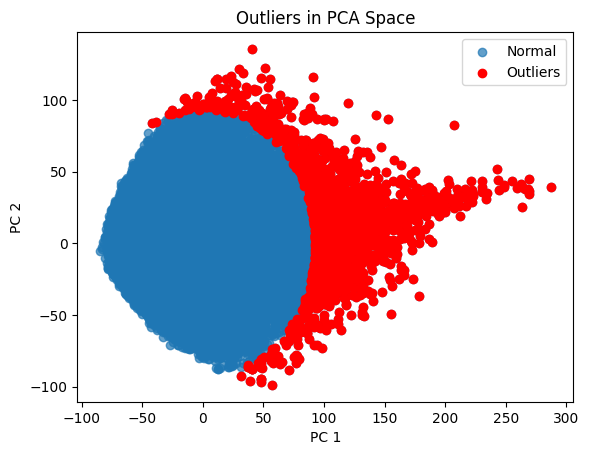

In [31]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# distances from the mean point (cluster center)
distances = cdist(pca_result, np.mean(pca_result, axis=0).reshape(1, -1))
distances = distances.flatten()  # Flatten to 1D

# threshold for outliers 
threshold = np.percentile(distances, 95)
outliers = distances > threshold 

# Scatter plot to visualize normal points and outliers
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, label="Normal")
plt.scatter(pca_result[outliers, 0], pca_result[outliers, 1], color="red", label="Outliers")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.title("Outliers in PCA Space")
plt.show()
